In [49]:
######### 답안01 #########
import pandas as pd

In [50]:
######### 답안02 #########
df = pd.read_csv('data/signal_AICE_20250915.csv')
df.head()

,RID,Time_Departure,Time_Arrival,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Weekday,Hour,Day,Signaltype
0,1,2023-01-04 18:00:00,2023-01-04 18:32:01,13284,1921,24.89,서울특별시,서초구,2,18,4,6
1,2,2023-01-11 18:00:00,2023-01-11 18:54:52,18023,3292,19.71,서울특별시,서초구,2,18,11,2
2,3,2023-01-08 15:00:00,2023-01-08 15:11:26,4433,686,23.26,서울특별시,송파구,6,15,8,20
3,4,2023-01-06 19:00:00,2023-01-06 20:32:11,27658,5531,18.00,경기도,고양시,4,19,6,9
4,5,2023-01-15 09:00:00,2023-01-15 09:08:18,3899,498,28.15,경기도,하남시,6,9,15,22


In [51]:
# 코드 실행
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

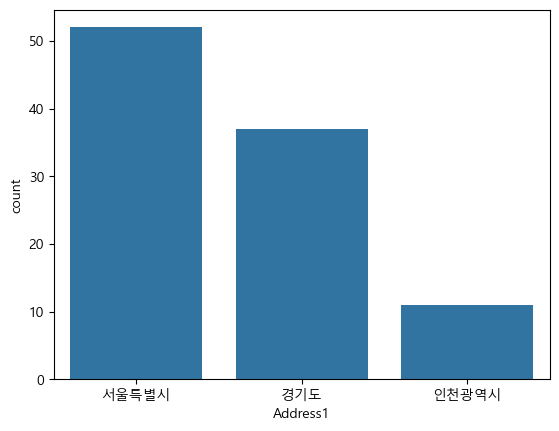

In [52]:
######### 답안03 #########
sns.countplot(data=df, x='Address1')
df = df[(df['Address1'] != '-')]
답안03 = 3

# countplot 의 y축 tick에서 직접 갯수를 파악하기 어려운 경우는
# df['Address1'] == '-').sum()
# 또는 df['Address1'].value_counts() 로 갯수값을 알아낸다.

# .size()  NaN 제외한 개수 세기
# .count()  NaN 제외한 개수 세기
# .drop_duplicates()  중복 행 제거
# .value_counts()  각 값의 개수 세기
# .sort_values(by='column_name')  값 기준 정렬
# .mode()  최빈값

In [53]:
######### 답안04 #########
답안04_1 = 'corr()'
답안04_2 = 'Time_Driving'

column_list = ['Distance', 'Time_Driving', 'Speed_Per_Hour', 'Weekday', 'Hour', 'Day', 'Signaltype']
df[column_list].corr()

# 여기서 답안04_2 를 다이렉트로 찾으려면
# cm = df[column_list].corr()
# print(cm['Distance'].nlargest(2))

# 사실, 숫자 컬럼만 상관관계 분석이 가능하므로,
# num_cols = df.select_dtypes(include=['number']).columns.tolist() 로 컬럼 리스트를 구한다음
# df[num_cols].corr() 로 상관관계 분석을 수행하는 것이 일반적이나 문제는 주어져 있다.

,Distance,Time_Driving,Speed_Per_Hour,Weekday,Hour,Day,Signaltype
Distance,1.000000,0.919594,0.071469,-0.139608,0.139699,-0.004047,-0.010400
Time_Driving,0.919594,1.000000,-0.273267,-0.063557,0.133609,0.011603,0.125865
Speed_Per_Hour,0.071469,-0.273267,1.000000,-0.119506,-0.097303,-0.052209,-0.406973
Weekday,-0.139608,-0.063557,-0.119506,1.000000,-0.146318,0.271293,0.156657
Hour,0.139699,0.133609,-0.097303,-0.146318,1.000000,-0.185475,0.068298
Day,-0.004047,0.011603,-0.052209,0.271293,-0.185475,1.000000,0.128030
Signaltype,-0.010400,0.125865,-0.406973,0.156657,0.068298,0.128030,1.000000


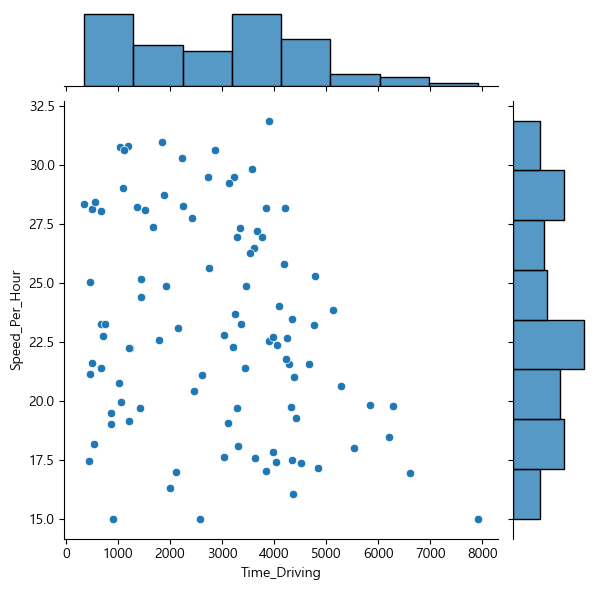

In [54]:
######### 답안05 #########
sns.jointplot(df, x='Time_Driving', y='Speed_Per_Hour')

In [55]:
######### 답안06 #########
df_temp = df[df['Speed_Per_Hour'] <= 300]
df_temp.drop(columns='RID', inplace=True)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time_Departure  100 non-null    object 
 1   Time_Arrival    100 non-null    object 
 2   Distance        100 non-null    int64  
 3   Time_Driving    100 non-null    int64  
 4   Speed_Per_Hour  100 non-null    float64
 5   Address1        100 non-null    object 
 6   Address2        100 non-null    object 
 7   Weekday         100 non-null    int64  
 8   Hour            100 non-null    int64  
 9   Day             100 non-null    int64  
 10  Signaltype      100 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 8.7+ KB


In [56]:
######### 답안07 #########
df_temp.isnull().sum()      # 결측치 갯수 확인
df_na = df_temp.dropna()    # 결측치 제거
df_na.isnull().sum()        # 결측치 제거 확인
답안07 = 2

In [57]:
######### 답안08 #########
df_del = df_na.drop(columns=['Time_Departure', 'Time_Arrival'])
df_del

,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Weekday,Hour,Day,Signaltype
0,13284,1921,24.89,서울특별시,서초구,2,18,4,6
1,18023,3292,19.71,서울특별시,서초구,2,18,11,2
2,4433,686,23.26,서울특별시,송파구,6,15,8,20
3,27658,5531,18.00,경기도,고양시,4,19,6,9
4,3899,498,28.15,경기도,하남시,6,9,15,22
...,...,...,...,...,...,...,...,...,...
95,19749,3982,17.85,경기도,성남시,4,7,13,19
96,25803,3537,26.26,서울특별시,서초구,0,10,9,18
97,30710,4764,23.21,서울특별시,강서구,5,9,7,2
98,15116,1891,28.76,서울특별시,송파구,3,10,12,8


In [66]:
######### 답안09 #########
df_preset = pd.get_dummies(df_del, columns=['Address1', 'Address2'])
# 사실, 0,1 로 인코딩 하려면 dtype=int 옵션을 추가해야 한다.
# 즉, df_preset = pd.get_dummies(df_del, columns=['Address1', 'Address2'], dtype=int)
print(df_preset.info())
print(df_preset.head())

# 범주형 데이터 컬럼만을 선택해서 원-핫 인코딩 수행하는 방법
# cat_cols = df.select_dtypes(include='object').columns.tolist()
# df_preset = pd.get_dummies(df_del, columns=cat_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Distance        100 non-null    int64  
 1   Time_Driving    100 non-null    int64  
 2   Speed_Per_Hour  100 non-null    float64
 3   Weekday         100 non-null    int64  
 4   Hour            100 non-null    int64  
 5   Day             100 non-null    int64  
 6   Signaltype      100 non-null    int64  
 7   Address1_경기도    100 non-null    bool   
 8   Address1_서울특별시  100 non-null    bool   
 9   Address1_인천광역시  100 non-null    bool   
 10  Address2_강남구    100 non-null    bool   
 11  Address2_강서구    100 non-null    bool   
 12  Address2_고양시    100 non-null    bool   
 13  Address2_과천시    100 non-null    bool   
 14  Address2_마포구    100 non-null    bool   
 15  Address2_부평구    100 non-null    bool   
 16  Address2_서초구    100 non-null    bool   
 17  Address2_성남시    100 non-null    bool

In [59]:
######### 답안10 #########
X = df_preset.drop('Time_Driving', axis=1)
y = df_preset['Time_Driving']
print('X, y shape:', X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_valid = rs.transform(X_valid)

X, y shape: (100, 24) (100,)
(80, 24) (20, 24) (80,) (20,)


In [60]:
######### 답안11 #########
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(max_depth=5, min_samples_split=3, random_state=120)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
######### 답안12 #########
y_pred_dt = dt.predict(X_valid)
y_pred_rf = rf.predict(X_valid)

from sklearn.metrics import mean_absolute_error
dt_mae = mean_absolute_error(y_valid, y_pred_dt)
rf_mae = mean_absolute_error(y_valid, y_pred_dt)
print(dt_mae, rf_mae)
답안12 = 'randomforest'

437.8482142857142 437.8482142857142


In [62]:
# 코드 실행
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(1)

In [63]:
######### 답안13 #########
model = Sequential()
model.add(Dense(64, activation='selu', input_dim=X.shape[1]))
# model.add(Input((X.shape[1],)))   # keras recommend this.
# use input_dim for 1D data.  use input_shape(X_shape[1],) for 2D.
model.add(Dense(64, activation='selu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='selu'))
model.add(Dense(16, activation='selu'))
model.add(Dense(1, activation='linear'))

es = EarlyStopping(monitor='val_loss', patience=9)
ms = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)   # save file '.h5' format is deprecated.

# model.summary()   모델 요약 출력
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data = (X_valid, y_valid), callbacks=[es, ms])

"""
위 코드는 validation_data => cross-validation 을 수행
만약 validation_split=0.2 를 사용하면, train 데이터의 20%를 사용하여 cross-validation 수행

test 용 데이터셋이 별도로 있다면,
    from sklearn.metrics import mean_squared_error
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

(1) 예제문제는 회귀문제인데, 분류 문제가 시험에 나온다. 만약 마지막 출력층이
    model.add(Dense(1, activation='sigmoid'))
    인 이진분류문제 라면,
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    y_prob = model.predict(X_test)    # 예측 확률
    y_pred = (y_prob > 0.5).astype(int) 로 0 또는 1 로 저장한다

(2) softmax 함수를 사용한 다중클래스 분류 문제일 경우,
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    y_pred = np.argmax(model.predict(X_test), axis=1)
    로 큰 값을 저장한다.  axis=1 은 컬럼방향 최대값 선택의 의미
    np.argmax() : 행(axis=0) 또는 열(axis=1)을 따라 가장 큰 값(높은 확률)의 index 반환

참고 : np.argmax() 는 행(axis=0) 또는 열(axis=1)을 따라 가장 큰 값(높은 확률)의 index 반환

sklearn의 분류기(LogisticRegression, RandomForestClassifier 등)에는 .predict_proba()가 있지만,
Keras 모델에는 .predict_proba() 메서드는 존재하지 않음.  tf.keras 모델은 model.predict가
“마지막 층의 출력값”을 그대로 반환한다.

sigmoid(이진 분류)면 predict 결과가 확률.
    이진 분류에서 predict가 (샘플수, 1) 형태로 나오므로,
    y_prob = model.predict(X_test).ravel()로 1차원 벡터로 변환
    y_pred = (y_prob > 0.5).astype(int) 로 해서 True/False -> 1,0 으로 저장해서
    roc_auc_score, roc_curve 같은 sklearn 지표에 맞춥니다.

softmax(다중 분류)면 predict 결과가 각 클래스 확률 분포(합=1.0).
    y_prob = model.predict(X_test)            # 각 클래스별 확률 (softmax 출력)
    y_prob_pos = y_prob[:,1]                  # metrics score 계산을 위한 True 확률(roc_score 계산에 사용)
    y_pred = np.argmax(y_prob, axis=1)        # 확률이 가장 큰 클래스 선택

numpy.ravel(a, order='C') : Return a contiguous flattened array.
numpy.array.ravel()은 모양(차원)을 (N,1) → (N,)으로 축소함.

// 분류문제에서 성능지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report", classification_report(y_test, y_pred))
    여기서 주의할것은 y_test 가 to_categorical(y_test, num_classes=2) 로 이미 변환된 것이라면,
    (- 물론, valid 가 아닌 별도 test set 이라면 to_categorical 을 할 필요도 없음)
    성능지표 계산시에는 y_test = np.argmax(y_valid, axis=1) 등으로 차원을 맞춰줘야 한다.
"""

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 10575466.0000 - mse: 10575466.0000 - val_loss: 12956044.0000 - val_mse: 12956044.0000
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10568897.0000 - mse: 10568897.0000 - val_loss: 12948603.0000 - val_mse: 12948603.0000
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10562802.0000 - mse: 10562802.0000 - val_loss: 12941013.0000 - val_mse: 12941013.0000
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10556253.0000 - mse: 10556253.0000 - val_loss: 12933323.0000 - val_mse: 12933323.0000
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10549724.0000 - mse: 10549724.0000 - val_loss: 12925139.0000 - val_mse: 12925139.0000
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10542141.0000 - mse: 10542141.0000 - val_loss: 12916440.0000 - val_mse: 12916440.0000
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10534849.0000 - mse: 10534849.0000 - val_loss: 12907004.0000 - val_mse: 129070

'\n위 코드는 validation_data => cross-validation 을 수행\n만약 validation_split=0.2 를 사용하면, train 데이터의 20%를 사용하여 cross-validation 수행\n\ntest 용 데이터셋이 별도로 있다면,\n    from sklearn.metrics import mean_squared_error\n    y_pred = model.predict(X_test)\n    mse = mean_squared_error(y_test, y_pred)\n\n(1) 예제문제는 회귀문제인데, 분류 문제가 시험에 나온다. 만약 마지막 출력층이\n    model.add(Dense(1, activation=\'sigmoid\'))\n    인 이진분류문제 라면,\n    model.compile(optimizer=\'adam\', loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n    y_prob = model.predict(X_test)    # 예측 확률\n    y_pred = (y_prob > 0.5).astype(int) 로 0 또는 1 로 저장한다\n\n(2) softmax 함수를 사용한 다중클래스 분류 문제일 경우,\n    model.add(Dense(2, activation=\'softmax\'))\n    model.compile(optimizer=\'adam\', loss=\'categorical_crossentropy\', metrics=[\'accuracy\'])\n    y_pred = np.argmax(model.predict(X_test), axis=1)\n    로 큰 값을 저장한다.  axis=1 은 컬럼방향 최대값 선택의 의미\n    np.argmax() : 행(axis=0) 또는 열(axis=1)을 따라 가장 큰 값(높은 확률)의 index 반환\n\n참고 : np.argmax() 는 행(axis=0) 또는 열(axis=1)을 따라

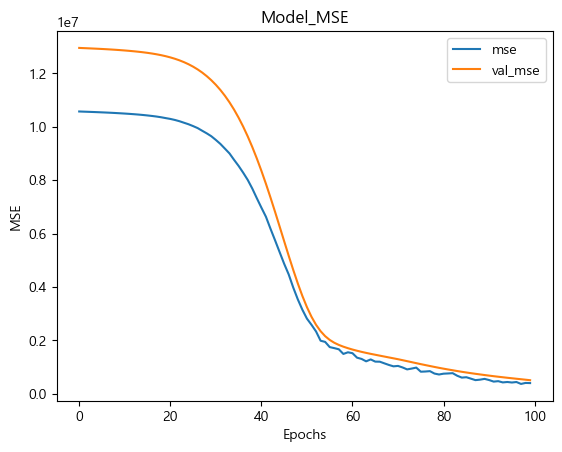

In [64]:
######### 답안14 #########
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model_MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['mse', 'val_mse'])
plt.show()